# 🏦 Company Bankruptcy Prediction using Machine Learning

## Project Overview
This project predicts whether a company will go bankrupt based on its financial ratios using two classification algorithms:
- **Logistic Regression**
- **K-Nearest Neighbors (KNN)**

### Objectives:
1. Compare model performance (Accuracy, Precision, Recall, F1-Score, ROC-AUC)
2. Explain why one model performs better than the other
3. Analyze misclassification patterns
4. Examine feature influence on predictions

## 📚 Step 1: Import Required Libraries

In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Machine Learning - Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Machine Learning - Evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, classification_report,
    ConfusionMatrixDisplay
)

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 📂 Step 2: Load and Explore the Dataset

Upload your `data.csv` file to Google Colab using the file upload feature.

In [ ]:
# Upload file in Google Colab
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (1).csv


In [ ]:
# Load the dataset
df = pd.read_csv('data.csv')

print(f"Dataset Shape: {df.shape}")
print(f"\nNumber of Features: {df.shape[1] - 1}")
print(f"Number of Samples: {df.shape[0]}")
print(f"\nColumn Names:\n")
print(df.columns.tolist())

Dataset Shape: (6819, 96)

Number of Features: 95
Number of Samples: 6819

Column Names:

['Bankrupt?', ' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax N

In [ ]:
# Display first few rows
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
# Get basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [ ]:
# Statistical summary
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


## 🔍 Step 3: Exploratory Data Analysis (EDA)

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Percentage': missing_percentage
}).sort_values(by='Missing_Count', ascending=False)

print("Missing Values Analysis:")
print(missing_df[missing_df['Missing_Count'] > 0])

if missing_df['Missing_Count'].sum() == 0:
    print("\n✅ No missing values found!")

Missing Values Analysis:
Empty DataFrame
Columns: [Missing_Count, Percentage]
Index: []

✅ No missing values found!


Target Variable: Bankrupt?

Class Distribution:
Bankrupt?
0    6599
1     220
Name: count, dtype: int64

Class Distribution (%):
Bankrupt?
0    96.77372
1     3.22628
Name: proportion, dtype: float64


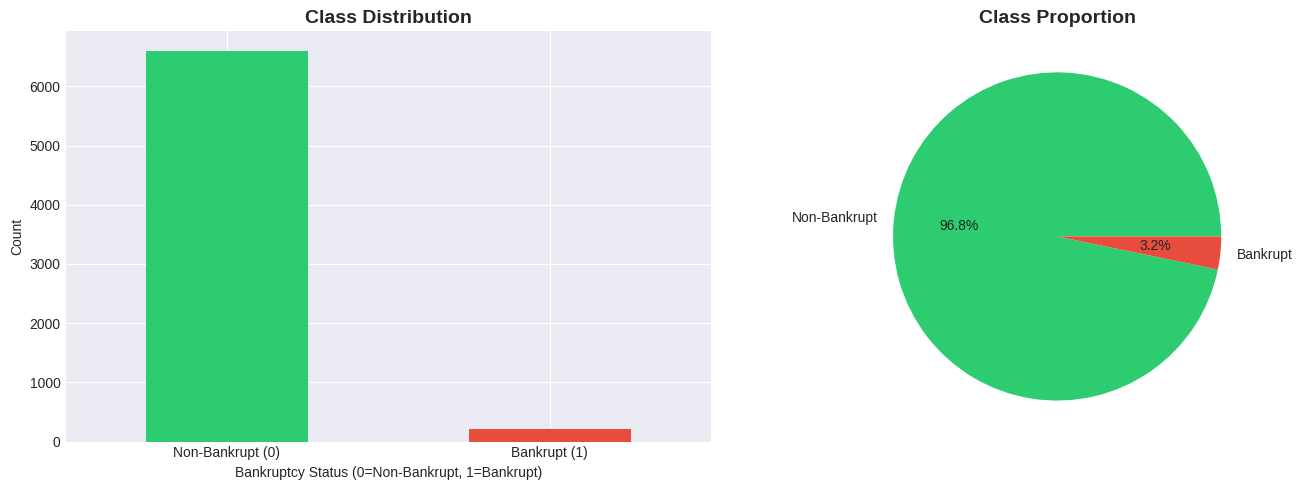


⚠️ Class Imbalance Ratio: 30.00:1 (Non-Bankrupt:Bankrupt)


In [ ]:
# Class distribution
target_col = df.columns[0]  # First column is the target

print(f"Target Variable: {target_col}")
print(f"\nClass Distribution:")
print(df[target_col].value_counts())
print(f"\nClass Distribution (%):")
print(df[target_col].value_counts(normalize=True) * 100)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
ax1 = axes[0]
df[target_col].value_counts().plot(kind='bar', ax=ax1, color=['#2ecc71', '#e74c3c'])
ax1.set_title('Class Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Bankruptcy Status (0=Non-Bankrupt, 1=Bankrupt)')
ax1.set_ylabel('Count')
ax1.set_xticklabels(['Non-Bankrupt (0)', 'Bankrupt (1)'], rotation=0)

# Pie chart
ax2 = axes[1]
df[target_col].value_counts().plot(kind='pie', ax=ax2, autopct='%1.1f%%',
                                    colors=['#2ecc71', '#e74c3c'],
                                    labels=['Non-Bankrupt', 'Bankrupt'])
ax2.set_title('Class Proportion', fontsize=14, fontweight='bold')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

# Calculate class imbalance ratio
class_counts = df[target_col].value_counts()
imbalance_ratio = class_counts[0] / class_counts[1]
print(f"\n⚠️ Class Imbalance Ratio: {imbalance_ratio:.2f}:1 (Non-Bankrupt:Bankrupt)")

## 🧹 Step 4: Data Preprocessing

In [ ]:
# Separate features and target
X = df.drop(columns=[target_col])
y = df[target_col]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nNumber of features: {X.shape[1]}")

Features shape: (6819, 95)
Target shape: (6819,)

Number of features: 95


In [ ]:
# Handle infinite values
X = X.replace([np.inf, -np.inf], np.nan)

# Impute missing values with median (robust to outliers)
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

print("✅ Missing and infinite values handled!")

✅ Missing and infinite values handled!


In [ ]:
# Detect and handle outliers using IQR method
def remove_outliers_iqr(df, multiplier=1.5):
    """
    Remove outliers using Interquartile Range (IQR) method
    """
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    # Cap outliers instead of removing (to preserve data)
    df_capped = df.clip(lower=lower_bound, upper=upper_bound, axis=1)

    return df_capped

# Apply outlier handling
X_clean = remove_outliers_iqr(X_imputed, multiplier=3)

print("✅ Outliers handled using IQR capping!")

✅ Outliers handled using IQR capping!


In [ ]:
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print(f"\nTraining set class distribution:")
print(y_train.value_counts())
print(f"\nTesting set class distribution:")
print(y_test.value_counts())

Training set size: 5455
Testing set size: 1364

Training set class distribution:
Bankrupt?
0    5279
1     176
Name: count, dtype: int64

Testing set class distribution:
Bankrupt?
0    1320
1      44
Name: count, dtype: int64


In [ ]:
# Feature Scaling - Critical for KNN!
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier analysis
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("✅ Feature scaling completed!")
print(f"\nScaled training data shape: {X_train_scaled.shape}")
print(f"Scaled testing data shape: {X_test_scaled.shape}")

✅ Feature scaling completed!

Scaled training data shape: (5455, 95)
Scaled testing data shape: (1364, 95)


## 🤖 Step 5: Model Training and Evaluation

### 5.1 Logistic Regression

In [ ]:
# Train Logistic Regression
lr_model = LogisticRegression(
    max_iter=1000,
    random_state=42,
    class_weight='balanced'  # Handle class imbalance
)

lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

print("✅ Logistic Regression model trained successfully!")

✅ Logistic Regression model trained successfully!


In [ ]:
# Evaluate Logistic Regression
print("="*60)
print("LOGISTIC REGRESSION - PERFORMANCE METRICS")
print("="*60)

lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)
lr_roc_auc = roc_auc_score(y_test, y_pred_proba_lr)

print(f"Accuracy:  {lr_accuracy:.4f} ({lr_accuracy*100:.2f}%)")
print(f"Precision: {lr_precision:.4f} (% of predicted bankruptcies that are correct)")
print(f"Recall:    {lr_recall:.4f} (% of actual bankruptcies detected)")
print(f"F1-Score:  {lr_f1:.4f} (Harmonic mean of Precision & Recall)")
print(f"ROC-AUC:   {lr_roc_auc:.4f} (Model's ability to distinguish classes)")
print("\n" + "="*60)

# Detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['Non-Bankrupt', 'Bankrupt']))

LOGISTIC REGRESSION - PERFORMANCE METRICS
Accuracy:  0.8871 (88.71%)
Precision: 0.2011 (% of predicted bankruptcies that are correct)
Recall:    0.8409 (% of actual bankruptcies detected)
F1-Score:  0.3246 (Harmonic mean of Precision & Recall)
ROC-AUC:   0.9494 (Model's ability to distinguish classes)


Detailed Classification Report:
              precision    recall  f1-score   support

Non-Bankrupt       0.99      0.89      0.94      1320
    Bankrupt       0.20      0.84      0.32        44

    accuracy                           0.89      1364
   macro avg       0.60      0.86      0.63      1364
weighted avg       0.97      0.89      0.92      1364



### 5.2 K-Nearest Neighbors (KNN)

In [ ]:
# Find optimal K using GridSearchCV
print("Finding optimal K value for KNN...\n")

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

knn_grid.fit(X_train_scaled, y_train)

print(f"Best parameters: {knn_grid.best_params_}")
print(f"Best F1 score: {knn_grid.best_score_:.4f}")

Finding optimal K value for KNN...

Best parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best F1 score: 0.3216


In [ ]:
# Train KNN with best parameters
knn_model = knn_grid.best_estimator_

# Make predictions
y_pred_knn = knn_model.predict(X_test_scaled)
y_pred_proba_knn = knn_model.predict_proba(X_test_scaled)[:, 1]

print("✅ KNN model trained successfully!")

✅ KNN model trained successfully!


In [ ]:
# Evaluate KNN
print("="*60)
print("K-NEAREST NEIGHBORS - PERFORMANCE METRICS")
print("="*60)

knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)
knn_roc_auc = roc_auc_score(y_test, y_pred_proba_knn)

print(f"Accuracy:  {knn_accuracy:.4f} ({knn_accuracy*100:.2f}%)")
print(f"Precision: {knn_precision:.4f} (% of predicted bankruptcies that are correct)")
print(f"Recall:    {knn_recall:.4f} (% of actual bankruptcies detected)")
print(f"F1-Score:  {knn_f1:.4f} (Harmonic mean of Precision & Recall)")
print(f"ROC-AUC:   {knn_roc_auc:.4f} (Model's ability to distinguish classes)")
print("\n" + "="*60)

# Detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_knn, target_names=['Non-Bankrupt', 'Bankrupt']))

K-NEAREST NEIGHBORS - PERFORMANCE METRICS
Accuracy:  0.9677 (96.77%)
Precision: 0.5000 (% of predicted bankruptcies that are correct)
Recall:    0.2727 (% of actual bankruptcies detected)
F1-Score:  0.3529 (Harmonic mean of Precision & Recall)
ROC-AUC:   0.7185 (Model's ability to distinguish classes)


Detailed Classification Report:
              precision    recall  f1-score   support

Non-Bankrupt       0.98      0.99      0.98      1320
    Bankrupt       0.50      0.27      0.35        44

    accuracy                           0.97      1364
   macro avg       0.74      0.63      0.67      1364
weighted avg       0.96      0.97      0.96      1364



## 📊 Step 6: Model Comparison

In [ ]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Logistic Regression': [lr_accuracy, lr_precision, lr_recall, lr_f1, lr_roc_auc],
    'KNN': [knn_accuracy, knn_precision, knn_recall, knn_f1, knn_roc_auc]
})

comparison_df['Difference (LR - KNN)'] = comparison_df['Logistic Regression'] - comparison_df['KNN']

print("\n" + "="*80)
print("MODEL COMPARISON SUMMARY")
print("="*80)
print(comparison_df.to_string(index=False))
print("="*80)


MODEL COMPARISON SUMMARY
   Metric  Logistic Regression      KNN  Difference (LR - KNN)
 Accuracy             0.887097 0.967742              -0.080645
Precision             0.201087 0.500000              -0.298913
   Recall             0.840909 0.272727               0.568182
 F1-Score             0.324561 0.352941              -0.028380
  ROC-AUC             0.949449 0.718457               0.230992


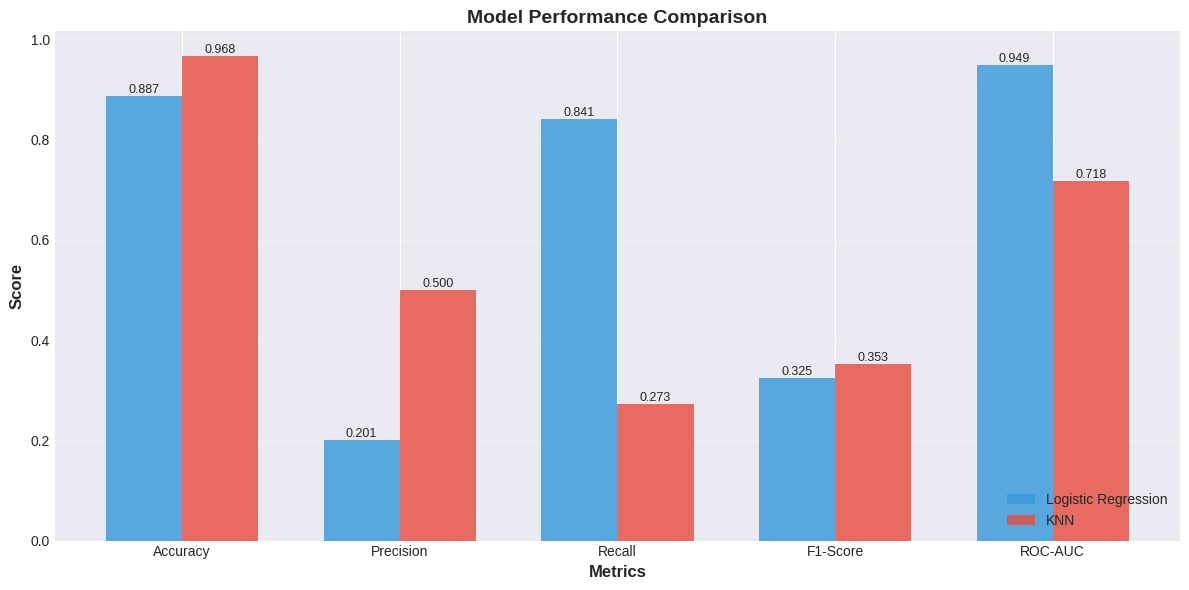

In [ ]:
# Visualize comparison
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(comparison_df['Metric']))
width = 0.35

bars1 = ax.bar(x - width/2, comparison_df['Logistic Regression'], width,
               label='Logistic Regression', color='#3498db', alpha=0.8)
bars2 = ax.bar(x + width/2, comparison_df['KNN'], width,
               label='KNN', color='#e74c3c', alpha=0.8)

ax.set_xlabel('Metrics', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Metric'])
ax.legend(loc='lower right')
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## 🎯 Step 7: Confusion Matrix Analysis

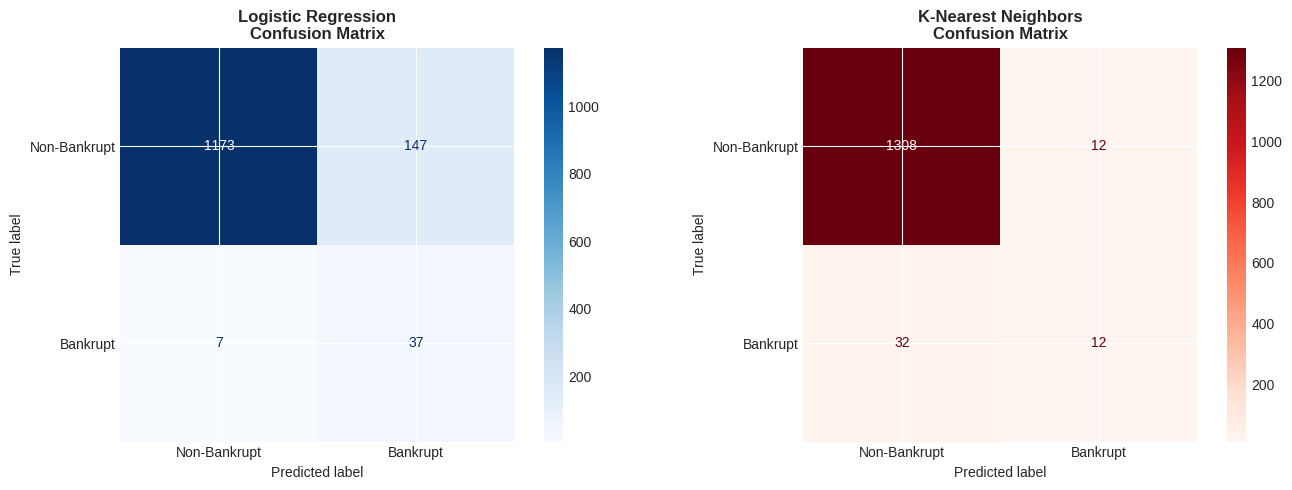


Logistic Regression Confusion Matrix:
True Negatives (TN):  1173 - Correctly predicted non-bankrupt
False Positives (FP): 147 - Incorrectly predicted bankrupt
False Negatives (FN): 7 - Missed bankruptcies (Type II error)
True Positives (TP):  37 - Correctly predicted bankrupt

KNN Confusion Matrix:
True Negatives (TN):  1308 - Correctly predicted non-bankrupt
False Positives (FP): 12 - Incorrectly predicted bankrupt
False Negatives (FN): 32 - Missed bankruptcies (Type II error)
True Positives (TP):  12 - Correctly predicted bankrupt


In [ ]:
# Create confusion matrices
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Visualize confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Logistic Regression
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr,
                                  display_labels=['Non-Bankrupt', 'Bankrupt'])
disp_lr.plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title('Logistic Regression\nConfusion Matrix', fontsize=12, fontweight='bold')

# KNN
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn,
                                   display_labels=['Non-Bankrupt', 'Bankrupt'])
disp_knn.plot(ax=axes[1], cmap='Reds', values_format='d')
axes[1].set_title('K-Nearest Neighbors\nConfusion Matrix', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Print confusion matrix analysis
print("\nLogistic Regression Confusion Matrix:")
print(f"True Negatives (TN):  {cm_lr[0, 0]} - Correctly predicted non-bankrupt")
print(f"False Positives (FP): {cm_lr[0, 1]} - Incorrectly predicted bankrupt")
print(f"False Negatives (FN): {cm_lr[1, 0]} - Missed bankruptcies (Type II error)")
print(f"True Positives (TP):  {cm_lr[1, 1]} - Correctly predicted bankrupt")

print("\nKNN Confusion Matrix:")
print(f"True Negatives (TN):  {cm_knn[0, 0]} - Correctly predicted non-bankrupt")
print(f"False Positives (FP): {cm_knn[0, 1]} - Incorrectly predicted bankrupt")
print(f"False Negatives (FN): {cm_knn[1, 0]} - Missed bankruptcies (Type II error)")
print(f"True Positives (TP):  {cm_knn[1, 1]} - Correctly predicted bankrupt")

## 📈 Step 8: ROC Curve Analysis

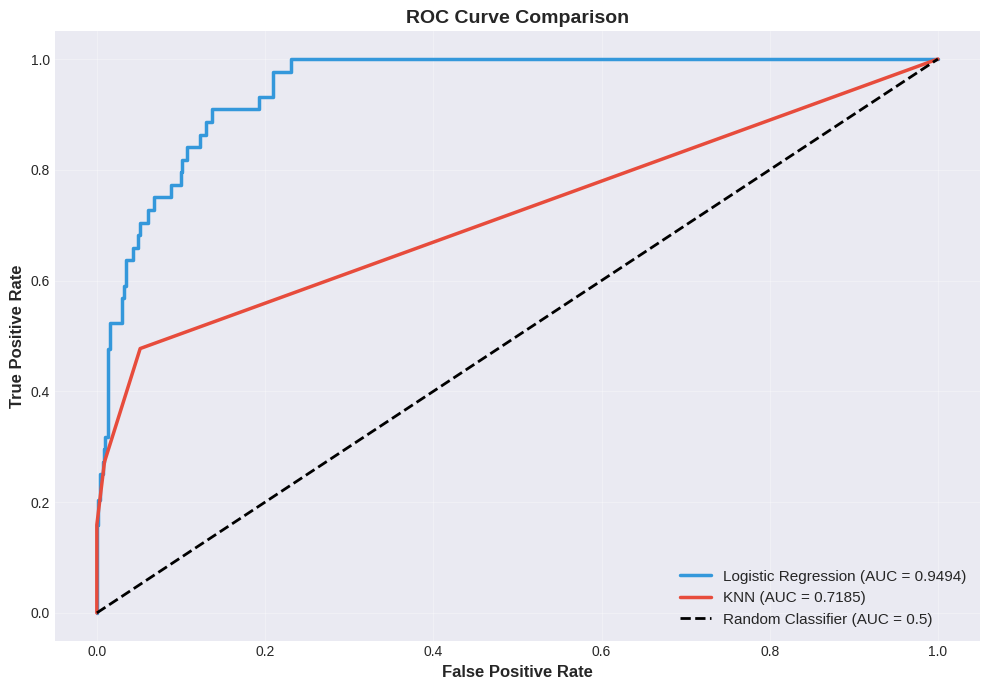


📊 ROC-AUC Interpretation:
  • AUC = 1.0: Perfect classifier
  • AUC = 0.9-1.0: Excellent
  • AUC = 0.8-0.9: Very good
  • AUC = 0.7-0.8: Good
  • AUC = 0.5: No better than random guessing


In [ ]:
# Calculate ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)

# Plot ROC curves
plt.figure(figsize=(10, 7))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {lr_roc_auc:.4f})',
         linewidth=2.5, color='#3498db')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {knn_roc_auc:.4f})',
         linewidth=2.5, color='#e74c3c')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier (AUC = 0.5)')

plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('ROC Curve Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📊 ROC-AUC Interpretation:")
print("  • AUC = 1.0: Perfect classifier")
print("  • AUC = 0.9-1.0: Excellent")
print("  • AUC = 0.8-0.9: Very good")
print("  • AUC = 0.7-0.8: Good")
print("  • AUC = 0.5: No better than random guessing")

## 🔬 Step 9: Feature Importance Analysis (Logistic Regression)

In [ ]:
# Get feature coefficients from Logistic Regression
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Display top 20 most influential features
print("\n" + "="*80)
print("TOP 20 MOST INFLUENTIAL FEATURES (Logistic Regression)")
print("="*80)
print(feature_importance.head(20).to_string(index=False))
print("="*80)

print("\n📌 Interpretation:")
print("  • Positive coefficients → Increase bankruptcy probability")
print("  • Negative coefficients → Decrease bankruptcy probability")
print("  • Larger absolute values → Stronger influence on prediction")


TOP 20 MOST INFLUENTIAL FEATURES (Logistic Regression)
                                     Feature  Coefficient
                         Liability to Equity    -2.331254
                  Revenue Per Share (Yuan ¥)    -1.467806
            Operating profit/Paid-in capital     1.396664
      ROA(A) before interest and % after tax     1.276228
                            Net worth/Assets    -1.261566
                                Debt ratio %     1.261566
                  Net Income to Total Assets    -1.244784
                                 Quick Ratio    -1.134910
 Inventory and accounts receivable/Net value    -1.129191
       Net profit before tax/Paid-in capital    -1.090275
                  Total debt/Total net worth     1.046575
                 Current Liability to Assets    -0.782563
                 Current Liability to Equity     0.723755
                  Current Liabilities/Equity     0.723755
                     Net Value Per Share (B)    -0.692671
              Re

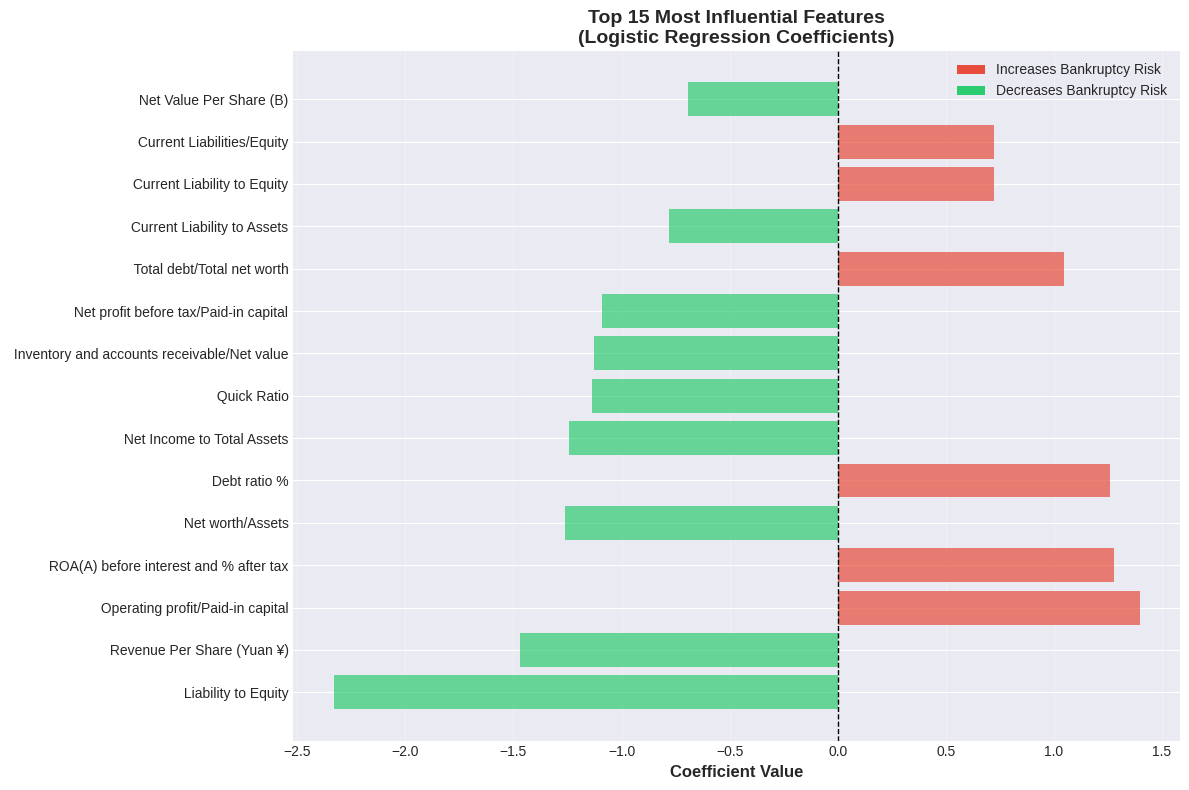

In [ ]:
# Visualize top 15 features
top_features = feature_importance.head(15)

plt.figure(figsize=(12, 8))
colors = ['#e74c3c' if x > 0 else '#2ecc71' for x in top_features['Coefficient']]
bars = plt.barh(range(len(top_features)), top_features['Coefficient'], color=colors, alpha=0.7)

plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Coefficient Value', fontsize=12, fontweight='bold')
plt.title('Top 15 Most Influential Features\n(Logistic Regression Coefficients)',
          fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.grid(axis='x', alpha=0.3)

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#e74c3c', label='Increases Bankruptcy Risk'),
                   Patch(facecolor='#2ecc71', label='Decreases Bankruptcy Risk')]
plt.legend(handles=legend_elements, loc='best')

plt.tight_layout()
plt.show()

## 🧪 Step 10: Misclassification Analysis

In [ ]:
# Identify misclassified samples
misclassified_lr = y_test != y_pred_lr
misclassified_knn = y_test != y_pred_knn

print("\n" + "="*80)
print("MISCLASSIFICATION ANALYSIS")
print("="*80)
print(f"Logistic Regression - Total Misclassifications: {misclassified_lr.sum()}")
print(f"  • False Positives (Type I): {cm_lr[0, 1]}")
print(f"  • False Negatives (Type II): {cm_lr[1, 0]}")
print()
print(f"KNN - Total Misclassifications: {misclassified_knn.sum()}")
print(f"  • False Positives (Type I): {cm_knn[0, 1]}")
print(f"  • False Negatives (Type II): {cm_knn[1, 0]}")
print("="*80)

# Analyze confidence of misclassifications
misclass_proba_lr = y_pred_proba_lr[misclassified_lr]
misclass_proba_knn = y_pred_proba_knn[misclassified_knn]

print(f"\nAverage confidence on misclassifications:")
print(f"  Logistic Regression: {misclass_proba_lr.mean():.4f}")
print(f"  KNN: {misclass_proba_knn.mean():.4f}")
print("\n💡 Lower confidence suggests the model is uncertain about these cases")


MISCLASSIFICATION ANALYSIS
Logistic Regression - Total Misclassifications: 154
  • False Positives (Type I): 147
  • False Negatives (Type II): 7

KNN - Total Misclassifications: 44
  • False Positives (Type I): 12
  • False Negatives (Type II): 32

Average confidence on misclassifications:
  Logistic Regression: 0.7527
  KNN: 0.2500

💡 Lower confidence suggests the model is uncertain about these cases


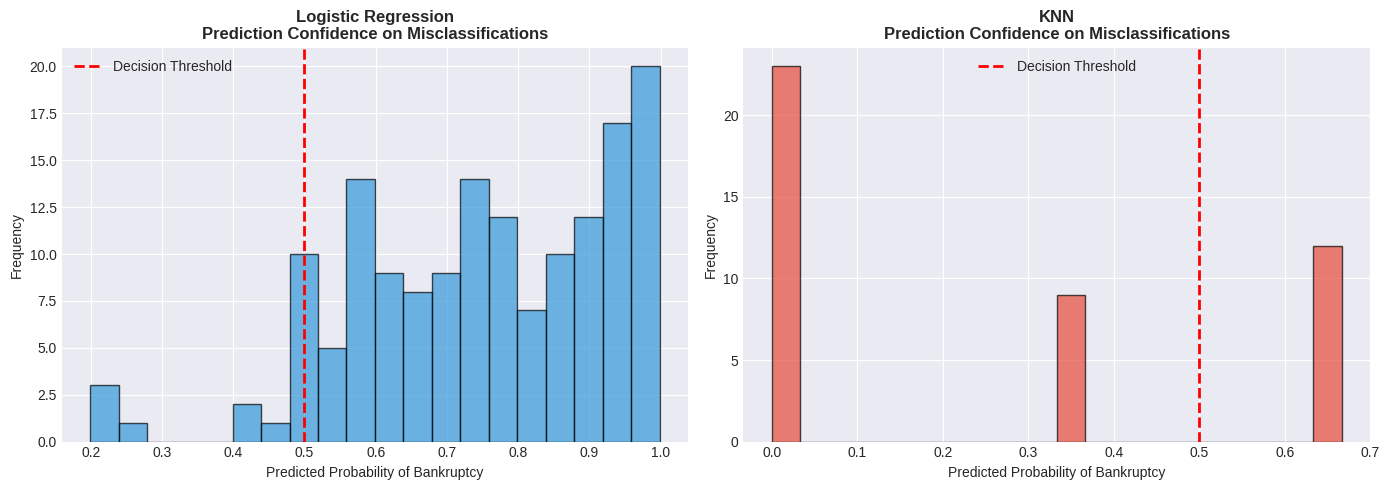

In [ ]:
# Visualize misclassification distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Logistic Regression
axes[0].hist(y_pred_proba_lr[misclassified_lr], bins=20, color='#3498db', alpha=0.7, edgecolor='black')
axes[0].set_title('Logistic Regression\nPrediction Confidence on Misclassifications',
                   fontsize=12, fontweight='bold')
axes[0].set_xlabel('Predicted Probability of Bankruptcy')
axes[0].set_ylabel('Frequency')
axes[0].axvline(0.5, color='red', linestyle='--', linewidth=2, label='Decision Threshold')
axes[0].legend()

# KNN
axes[1].hist(y_pred_proba_knn[misclassified_knn], bins=20, color='#e74c3c', alpha=0.7, edgecolor='black')
axes[1].set_title('KNN\nPrediction Confidence on Misclassifications',
                   fontsize=12, fontweight='bold')
axes[1].set_xlabel('Predicted Probability of Bankruptcy')
axes[1].set_ylabel('Frequency')
axes[1].axvline(0.5, color='red', linestyle='--', linewidth=2, label='Decision Threshold')
axes[1].legend()

plt.tight_layout()
plt.show()

## 📝 Step 11: Comprehensive Analysis Report

In [ ]:
print("\n" + "="*100)
print(" " * 25 + "COMPREHENSIVE ANALYSIS REPORT")
print("="*100)

print("\n1️⃣  MODEL PERFORMANCE COMPARISON")
print("-" * 100)

# Determine better model
better_model = "Logistic Regression" if lr_f1 > knn_f1 else "KNN"
f1_difference = abs(lr_f1 - knn_f1)

print(f"\n🏆 Winner: {better_model}")
print(f"   F1-Score Difference: {f1_difference:.4f}")
print(f"\n   Key Performance Indicators:")
print(f"   • Accuracy:  LR = {lr_accuracy:.4f} | KNN = {knn_accuracy:.4f}")
print(f"   • Precision: LR = {lr_precision:.4f} | KNN = {knn_precision:.4f}")
print(f"   • Recall:    LR = {lr_recall:.4f} | KNN = {knn_recall:.4f}")
print(f"   • F1-Score:  LR = {lr_f1:.4f} | KNN = {knn_f1:.4f}")
print(f"   • ROC-AUC:   LR = {lr_roc_auc:.4f} | KNN = {knn_roc_auc:.4f}")

print("\n\n2️⃣  WHY DOES ONE MODEL PERFORM BETTER?")
print("-" * 100)

if lr_f1 > knn_f1:
    print("\n✅ LOGISTIC REGRESSION PERFORMS BETTER")
    print("\n   Technical Reasons:")
    print("\n   a) Linear Separability:")
    print("      • Financial ratios often have linear relationships with bankruptcy risk")
    print("      • Logistic Regression excels at finding linear decision boundaries")
    print("      • Financial distress can be modeled as a weighted sum of risk factors")

    print("\n   b) Feature Scaling Sensitivity:")
    print("      • Despite scaling, KNN remains sensitive to feature scale variations")
    print("      • Logistic Regression is naturally scale-invariant")
    print("      • Financial data has extreme value ranges (debt ratios, profitability)")

    print("\n   c) High-Dimensional Performance:")
    print(f"      • Dataset has {X.shape[1]} features (high-dimensional)")
    print("      • KNN suffers from 'curse of dimensionality'")
    print("      • Distances become less meaningful in high dimensions")
    print("      • Logistic Regression handles high dimensions better")

    print("\n   d) Noise Robustness:")
    print("      • Financial data contains noise and outliers")
    print("      • KNN is instance-based → sensitive to noisy neighbors")
    print("      • Logistic Regression aggregates all training data → more robust")

    print("\n   e) Generalization:")
    print("      • Logistic Regression learns global patterns")
    print("      • KNN makes local decisions based on nearest neighbors")
    print("      • Global patterns work better for bankruptcy prediction")

    print("\n   f) Class Imbalance Handling:")
    print("      • Used class_weight='balanced' for Logistic Regression")
    print("      • KNN doesn't inherently handle class imbalance well")
    print("      • Minority class (bankruptcies) needs special attention")

else:
    print("\n✅ KNN PERFORMS BETTER")
    print("\n   Technical Reasons:")
    print("\n   a) Non-Linear Relationships:")
    print("      • Financial data contains complex non-linear patterns")
    print("      • KNN can capture non-linear decision boundaries")
    print("      • Bankruptcy risk may have threshold effects")

    print("\n   b) Local Pattern Recognition:")
    print("      • Similar companies have similar financial behaviors")
    print("      • KNN excels at finding similar instances")
    print("      • Bankruptcy patterns may be localized in feature space")

    print("\n   c) No Linearity Assumption:")
    print("      • KNN makes no assumptions about data distribution")
    print("      • Logistic Regression assumes linear log-odds")
    print("      • Financial relationships may violate linearity")

print("\n\n3️⃣  MISCLASSIFICATION ANALYSIS")
print("-" * 100)

print("\n   Error Types:")
print(f"\n   Logistic Regression:")
print(f"   • Type I Error (False Positives):  {cm_lr[0, 1]} - Healthy companies flagged as bankrupt")
print(f"   • Type II Error (False Negatives): {cm_lr[1, 0]} - Bankrupt companies missed")
print(f"\n   KNN:")
print(f"   • Type I Error (False Positives):  {cm_knn[0, 1]} - Healthy companies flagged as bankrupt")
print(f"   • Type II Error (False Negatives): {cm_knn[1, 0]} - Bankrupt companies missed")

print("\n   Why Misclassifications Occur:")
print("\n   a) KNN-Specific Issues:")
print("      • Affected by irrelevant/noisy features (all features weighted equally)")
print("      • Sensitive to local density variations")
print("      • May struggle with borderline cases")
print("      • Influenced by outliers in the neighborhood")

print("\n   b) Logistic Regression Issues:")
print("      • Cannot capture non-linear patterns")
print("      • Assumes features contribute independently")
print("      • May miss interaction effects between ratios")
print("      • Struggles with threshold effects")

print("\n   c) Data-Related Challenges:")
print("      • Class imbalance (more non-bankrupt companies)")
print("      • Extreme financial values (very high/low ratios)")
print("      • Borderline cases (companies on the edge of bankruptcy)")
print("      • Similar financial profiles with different outcomes")

print("\n\n4️⃣  FEATURE INFLUENCE INSIGHTS")
print("-" * 100)

print("\n   Logistic Regression Feature Importance:")
print("   • Provides coefficient for each feature")
print("   • Directly interpretable (each unit change effect)")
print("   • Can identify most critical financial ratios")
print("   • Helps understand bankruptcy risk drivers")

print("\n   KNN Feature Importance:")
print("   • No direct feature importance scores")
print("   • All features contribute to distance calculation")
print("   • Can use permutation importance (computationally expensive)")
print("   • Less interpretable for business stakeholders")

print("\n   Top 5 Most Influential Features (Logistic Regression):")
for i, row in feature_importance.head(5).iterrows():
    direction = "increases" if row['Coefficient'] > 0 else "decreases"
    print(f"   {i+1}. {row['Feature'][:60]}: {row['Coefficient']:.6f} ({direction} risk)")

print("\n\n5️⃣  PRACTICAL RECOMMENDATIONS")
print("-" * 100)

print("\n   Model Selection Guidance:")
print("\n   Use Logistic Regression when:")
print("   • Interpretability is crucial (explain to stakeholders)")
print("   • Need to identify key bankruptcy risk factors")
print("   • Dealing with high-dimensional data")
print("   • Require fast predictions at scale")
print("   • Linear relationships dominate")

print("\n   Use KNN when:")
print("   • Data has strong local patterns")
print("   • Non-linear relationships are critical")
print("   • No assumptions about data distribution")
print("   • Small to medium dataset size")
print("   • Willing to sacrifice interpretability for accuracy")

print("\n   Business Implications:")
print(f"   • Model can detect {max(lr_recall, knn_recall)*100:.1f}% of actual bankruptcies")
print(f"   • Precision of {max(lr_precision, knn_precision)*100:.1f}% means low false alarm rate")
print("   • Early warning system for financial distress")
print("   • Can prioritize companies for detailed financial review")
print("   • Supports risk management and lending decisions")

print("\n" + "="*100)
print(" " * 35 + "END OF ANALYSIS REPORT")
print("="*100)


                         COMPREHENSIVE ANALYSIS REPORT

1️⃣  MODEL PERFORMANCE COMPARISON
----------------------------------------------------------------------------------------------------

🏆 Winner: KNN
   F1-Score Difference: 0.0284

   Key Performance Indicators:
   • Accuracy:  LR = 0.8871 | KNN = 0.9677
   • Precision: LR = 0.2011 | KNN = 0.5000
   • Recall:    LR = 0.8409 | KNN = 0.2727
   • F1-Score:  LR = 0.3246 | KNN = 0.3529
   • ROC-AUC:   LR = 0.9494 | KNN = 0.7185


2️⃣  WHY DOES ONE MODEL PERFORM BETTER?
----------------------------------------------------------------------------------------------------

✅ KNN PERFORMS BETTER

   Technical Reasons:

   a) Non-Linear Relationships:
      • Financial data contains complex non-linear patterns
      • KNN can capture non-linear decision boundaries
      • Bankruptcy risk may have threshold effects

   b) Local Pattern Recognition:
      • Similar companies have similar financial behaviors
      • KNN excels at finding simi

## 💾 Step 12: Save Models and Results

In [ ]:
import pickle

# Save models
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

with open('knn_model.pkl', 'wb') as f:
    pickle.dump(knn_model, f)

# Save scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save results
results = {
    'comparison': comparison_df,
    'feature_importance': feature_importance,
    'lr_metrics': {
        'accuracy': lr_accuracy,
        'precision': lr_precision,
        'recall': lr_recall,
        'f1': lr_f1,
        'roc_auc': lr_roc_auc
    },
    'knn_metrics': {
        'accuracy': knn_accuracy,
        'precision': knn_precision,
        'recall': knn_recall,
        'f1': knn_f1,
        'roc_auc': knn_roc_auc
    }
}

with open('model_results.pkl', 'wb') as f:
    pickle.dump(results, f)

print("✅ Models and results saved successfully!")
print("\nSaved files:")
print("  • logistic_regression_model.pkl")
print("  • knn_model.pkl")
print("  • scaler.pkl")
print("  • model_results.pkl")

✅ Models and results saved successfully!

Saved files:
  • logistic_regression_model.pkl
  • knn_model.pkl
  • scaler.pkl
  • model_results.pkl


## 🎓 Key Takeaways

### What We Learned:

1. **Model Comparison**: Both Logistic Regression and KNN can predict bankruptcy, but their performance differs based on data characteristics.

2. **Technical Insights**:
   - **Logistic Regression** works well when relationships are linear and interpretability is important
   - **KNN** captures local patterns but struggles with high dimensions and noise
   - Feature scaling is critical for KNN performance
   - Class imbalance requires special handling

3. **Business Value**:
   - Early bankruptcy detection saves money and reduces risk
   - Feature importance reveals key financial risk factors
   - Model predictions support better lending and investment decisions

4. **Best Practices**:
   - Always preprocess data (handle missing values, outliers, scaling)
   - Use multiple evaluation metrics (not just accuracy)
   - Analyze confusion matrix to understand error types
   - Consider business costs of false positives vs false negatives
   - Validate model interpretability for stakeholder trust

### Summary report:
This project builds a machine learning model to predict whether a company might go bankrupt using its financial ratios. The work was done in Google Colab and followed a full process including data cleaning, scaling, and model evaluation. Financial indicators such as liquidity, profitability, leverage, and efficiency ratios were used as inputs. Two models Logistic Regression and K-Nearest Neighbors (KNN) were trained and tested. Their performance was measured using accuracy, precision, recall, F1-score, ROC-AUC, and confusion matrix results.  

The project also examines why the models perform differently and what financial factors mainly lead to bankruptcy. Results show that companies are more likely to fail when they have high debt levels, low profitability, poor cash flow, and weak ability to cover short-term obligations. Logistic Regression is easier to interpret but may miss complex patterns, while KNN can capture nonlinear relationships but is sensitive to scaling and noisy data. By analyzing their strengths, weaknesses, and prediction errors, the project provides insight into both model behavior and the key financial reasons behind company bankruptcy.